### **Load the dataset**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('sentences.csv')

# Inspect the first few rows
print(data.head())

# Display basic info about the dataset
print(data.info())


                                   darija  \
0    homa mkhbbyin chi haja, ana mti99en!   
1      bayna homa tay7awlo ib9aw mbrrdin.   
2  loTilat mabaynach fihom mori7in bzzaf.   
3      ghaliban ghayjrriw 3lih mn lkhdma!   
4                     Tab3an rah mkta2eb!   

                                                 eng  \
0                They're hiding something, I'm sure!   
1    It's obvious they're trying to keep their cool.   
2            the hotels don't seem very comfortable.   
3  he is probably about to be laid off by head of...   
4                         of course he's depressive!   

                               darija_ar  
0      هوما مخبّيين شي حاجة, أنا متيقّن!  
1     باينا هوما تايحاولو إبقاو مبرّدين.  
2  لوطيلات مابايناش فيهوم موريحين بزّاف.  
3        غاليبان غايجرّيو عليه من لخدما!  
4                     طابعان راه مكتاءب!  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87785 entries, 0 to 87784
Data columns (total 3 columns):
 #   Column     Non-Null C

### **Explore the Dataset**

In [2]:
# Check for missing values
print(data.isnull().sum())

# Display column names
print(data.columns)


darija           0
eng          75042
darija_ar        0
dtype: int64
Index(['darija', 'eng', 'darija_ar'], dtype='object')


            eng_len    darija_len  darija_ar_len
count  87785.000000  87785.000000   87785.000000
mean       1.702683      4.229390       4.229390
std        2.180233      2.040485       2.040485
min        1.000000      1.000000       1.000000
25%        1.000000      3.000000       3.000000
50%        1.000000      4.000000       4.000000
75%        1.000000      5.000000       5.000000
max       38.000000     29.000000      29.000000


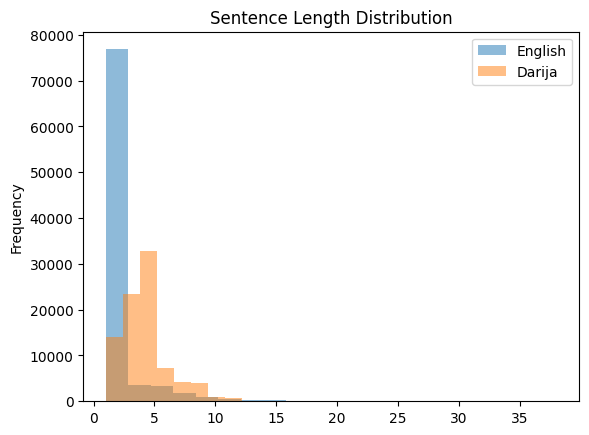

In [3]:
# Add new columns for sentence lengths
data['eng_len'] = data['eng'].apply(lambda x: len(str(x).split()))
data['darija_len'] = data['darija'].apply(lambda x: len(str(x).split()))
data['darija_ar_len'] = data['darija_ar'].apply(lambda x: len(str(x).split()))

# Print basic statistics
print(data[['eng_len', 'darija_len', 'darija_ar_len']].describe())

# Plot distributions of sentence lengths (optional)
import matplotlib.pyplot as plt

data['eng_len'].plot(kind='hist', bins=20, alpha=0.5, label='English')
data['darija_len'].plot(kind='hist', bins=20, alpha=0.5, label='Darija')
plt.legend()
plt.title('Sentence Length Distribution')
plt.show()


### **Clean the Dataset**

In [4]:
# Drop rows with null values
data.dropna(subset=['eng', 'darija', 'darija_ar'], inplace=True)

# Verify no missing values remain
print(data.isnull().sum())


darija           0
eng              0
darija_ar        0
eng_len          0
darija_len       0
darija_ar_len    0
dtype: int64


In [5]:
import re

def clean_text(text):
    # Lowercase, remove special characters, and strip spaces
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()
    return text

# Apply cleaning
data['eng'] = data['eng'].apply(clean_text)
data['darija'] = data['darija'].apply(clean_text)
data['darija_ar'] = data['darija_ar'].apply(clean_text)

# Verify cleaned text
print(data.head())


                                  darija  \
0     homa mkhbbyin chi haja ana mti99en   
1      bayna homa tay7awlo ib9aw mbrrdin   
2  lotilat mabaynach fihom mori7in bzzaf   
3      ghaliban ghayjrriw 3lih mn lkhdma   
4                     tab3an rah mkta2eb   

                                                 eng  \
0                    theyre hiding something im sure   
1       its obvious theyre trying to keep their cool   
2              the hotels dont seem very comfortable   
3  he is probably about to be laid off by head of...   
4                           of course hes depressive   

                             darija_ar  eng_len  darija_len  darija_ar_len  
0        هوما مخبيين شي حاجة أنا متيقن        5           6              6  
1     باينا هوما تايحاولو إبقاو مبردين        8           5              5  
2  لوطيلات مابايناش فيهوم موريحين بزاف        6           5              5  
3        غاليبان غايجريو عليه من لخدما       11           5              5  
4            

### **Split the Dataset**

In [6]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Verify splits
print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")


Training set: 10321 samples
Validation set: 1147 samples
Test set: 1275 samples


### **Data Tokenization**

In [7]:
!pip install transformers
from transformers import AutoTokenizer


In [8]:
# Initialize tokenizers
eng_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
darija_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [9]:
# Define a function to tokenize a dataset column
def tokenize_data(data, input_col, tokenizer, max_length=50):
    return tokenizer(
        data[input_col].tolist(),  # List of sentences to tokenize
        padding='max_length',     # Pad to max length
        truncation=True,          # Truncate sentences exceeding max_length
        max_length=max_length,    # Maximum token length
        return_tensors="pt"       # Return PyTorch tensors
    )

# Tokenize English and Darija sentences
train_eng_tokens = tokenize_data(train_data, 'eng', eng_tokenizer)
train_darija_tokens = tokenize_data(train_data, 'darija', darija_tokenizer)
val_eng_tokens = tokenize_data(val_data, 'eng', eng_tokenizer)
val_darija_tokens = tokenize_data(val_data, 'darija', darija_tokenizer)
test_eng_tokens = tokenize_data(test_data, 'eng', eng_tokenizer)
test_darija_tokens = tokenize_data(test_data, 'darija', darija_tokenizer)

# Verify tokenized shapes
print(train_eng_tokens['input_ids'].shape)  # Should match training size and max length
print(train_darija_tokens['input_ids'].shape)


torch.Size([10321, 50])
torch.Size([10321, 50])


In [10]:
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDatasets
train_dataset = TensorDataset(train_eng_tokens['input_ids'], train_darija_tokens['input_ids'])
val_dataset = TensorDataset(val_eng_tokens['input_ids'], val_darija_tokens['input_ids'])
test_dataset = TensorDataset(test_eng_tokens['input_ids'], test_darija_tokens['input_ids'])

# Define DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Verify DataLoader
for batch in train_loader:
    print(batch[0].shape, batch[1].shape)  # Input shape: (batch_size, max_length)
    break


torch.Size([32, 50]) torch.Size([32, 50])


### **Define the Baseline Vanilla LSTM Model**

In [11]:
import torch.nn as nn


In [12]:
class Seq2SeqLSTM(nn.Module):
    def __init__(self, input_dim, embed_dim, hidden_dim, output_dim, num_layers=1, dropout=0.3):
        super(Seq2SeqLSTM, self).__init__()

        # Embedding layers
        self.encoder_embedding = nn.Embedding(input_dim, embed_dim)
        self.decoder_embedding = nn.Embedding(output_dim, embed_dim)

        # LSTM layers with Dropout
        self.encoder_lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.decoder_lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)

        # Fully connected output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, src, trg):
        # Encode source sequence
        src_embed = self.encoder_embedding(src)
        _, (hidden, cell) = self.encoder_lstm(src_embed)

        # Decode target sequence
        trg_embed = self.decoder_embedding(trg)
        outputs, _ = self.decoder_lstm(trg_embed, (hidden, cell))

        # Apply linear layer to get predictions
        predictions = self.fc(outputs)
        return predictions


In [13]:
# Define parameters
input_dim = eng_tokenizer.vocab_size
output_dim = darija_tokenizer.vocab_size
embed_dim = 256
hidden_dim = 512
num_layers = 2

# Initialize model
model = Seq2SeqLSTM(input_dim, embed_dim, hidden_dim, output_dim, num_layers)
print(model)


Seq2SeqLSTM(
  (encoder_embedding): Embedding(30522, 256)
  (decoder_embedding): Embedding(30522, 256)
  (encoder_lstm): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.3)
  (decoder_lstm): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=512, out_features=30522, bias=True)
)


### **Training the Model**

In [14]:
pip install torch


In [15]:
import torch


In [18]:
!pip install tqdm


In [19]:
from tqdm import tqdm

# Modified training function with progress bar
def train_model(model, data_loader, optimizer, criterion, device, epoch):
    model.train()  # Set model to training mode
    total_loss = 0

    # Add a progress bar for the batches
    progress_bar = tqdm(enumerate(data_loader), total=len(data_loader), desc=f"Epoch {epoch+1} Training")

    for batch_idx, (src, trg) in progress_bar:
        # Move data to device
        src, trg = src.to(device), trg.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(src, trg[:, :-1])  # Input target sequence minus the last token
        outputs = outputs.reshape(-1, outputs.shape[-1])  # Reshape for loss computation
        trg = trg[:, 1:].reshape(-1)  # Shift target by one to match predictions

        # Compute loss
        loss = criterion(outputs, trg)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Update progress bar with current loss
        progress_bar.set_postfix(loss=loss.item())

    return total_loss / len(data_loader)

# Modified validation function with progress bar
def validate_model(model, data_loader, criterion, device, epoch):
    model.eval()  # Set model to evaluation mode
    total_loss = 0

    # Add a progress bar for the validation process
    progress_bar = tqdm(enumerate(data_loader), total=len(data_loader), desc=f"Epoch {epoch+1} Validation")

    with torch.no_grad():
        for batch_idx, (src, trg) in progress_bar:
            # Move data to device
            src, trg = src.to(device), trg.to(device)

            # Forward pass
            outputs = model(src, trg[:, :-1])
            outputs = outputs.reshape(-1, outputs.shape[-1])
            trg = trg[:, 1:].reshape(-1)

            # Compute loss
            loss = criterion(outputs, trg)
            total_loss += loss.item()

            # Update progress bar with current loss
            progress_bar.set_postfix(loss=loss.item())

    return total_loss / len(data_loader)

# Run training with progress bars
epochs = 7  # Number of training epochs

# Early Stopping Parameters
best_val_loss = float('inf')  # Initialize with a very high value
patience = 3  # Number of epochs to wait for improvement
wait = 0  # Counter to track epochs without improvement

epochs = 20  # Maximum number of epochs

for epoch in range(epochs):
    print(f"Starting Epoch {epoch+1}/{epochs}")

    # Training step
    train_loss = train_model(model, train_loader, optimizer, criterion, device, epoch)

    # Validation step
    val_loss = validate_model(model, val_loader, criterion, device, epoch)

    print(f"Epoch {epoch+1}/{epochs} Completed")
    print(f"Training Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")

    # Check for validation loss improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0  # Reset the counter for early stopping
        torch.save(model.state_dict(), "best_model.pt")  # Save the best model
        print("New best model saved!")
    else:
        wait += 1
        print(f"No improvement in validation loss for {wait} epoch(s).")

    # Stop training early if no improvement for 'patience' epochs
    if wait >= patience:
        print("Early stopping triggered!")
        break



Starting Epoch 1/20


Epoch 1 Validation: 100%|██████████| 36/36 [00:01<00:00, 35.03it/s, loss=5.62]


Epoch 1/20 Completed
Training Loss: 5.9519 | Validation Loss: 5.7715
New best model saved!
Starting Epoch 2/20


Epoch 2 Validation: 100%|██████████| 36/36 [00:01<00:00, 33.72it/s, loss=4.83]


Epoch 2/20 Completed
Training Loss: 5.4472 | Validation Loss: 4.9978
New best model saved!
Starting Epoch 3/20


Epoch 3 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.79it/s, loss=4.2]


Epoch 3/20 Completed
Training Loss: 4.5553 | Validation Loss: 4.3442
New best model saved!
Starting Epoch 4/20


Epoch 4 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.33it/s, loss=3.99]


Epoch 4/20 Completed
Training Loss: 4.0939 | Validation Loss: 4.0757
New best model saved!
Starting Epoch 5/20


Epoch 5 Validation: 100%|██████████| 36/36 [00:01<00:00, 33.19it/s, loss=3.8]


Epoch 5/20 Completed
Training Loss: 3.8069 | Validation Loss: 3.8802
New best model saved!
Starting Epoch 6/20


Epoch 6 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.81it/s, loss=3.67]


Epoch 6/20 Completed
Training Loss: 3.5704 | Validation Loss: 3.7398
New best model saved!
Starting Epoch 7/20


Epoch 7 Validation: 100%|██████████| 36/36 [00:01<00:00, 33.20it/s, loss=3.59]


Epoch 7/20 Completed
Training Loss: 3.3762 | Validation Loss: 3.6507
New best model saved!
Starting Epoch 8/20


Epoch 8 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.50it/s, loss=3.56]


Epoch 8/20 Completed
Training Loss: 3.2080 | Validation Loss: 3.5799
New best model saved!
Starting Epoch 9/20


Epoch 9 Validation: 100%|██████████| 36/36 [00:01<00:00, 33.06it/s, loss=3.45]


Epoch 9/20 Completed
Training Loss: 3.0553 | Validation Loss: 3.5214
New best model saved!
Starting Epoch 10/20


Epoch 10 Validation: 100%|██████████| 36/36 [00:01<00:00, 33.02it/s, loss=3.43]


Epoch 10/20 Completed
Training Loss: 2.9148 | Validation Loss: 3.4774
New best model saved!
Starting Epoch 11/20


Epoch 11 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.50it/s, loss=3.39]


Epoch 11/20 Completed
Training Loss: 2.7817 | Validation Loss: 3.4645
New best model saved!
Starting Epoch 12/20


Epoch 12 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.46it/s, loss=3.4]


Epoch 12/20 Completed
Training Loss: 2.6586 | Validation Loss: 3.4639
New best model saved!
Starting Epoch 13/20


Epoch 13 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.99it/s, loss=3.38]


Epoch 13/20 Completed
Training Loss: 2.5420 | Validation Loss: 3.4537
New best model saved!
Starting Epoch 14/20


Epoch 14 Validation: 100%|██████████| 36/36 [00:01<00:00, 33.05it/s, loss=3.38]


Epoch 14/20 Completed
Training Loss: 2.4321 | Validation Loss: 3.4523
New best model saved!
Starting Epoch 15/20


Epoch 15 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.89it/s, loss=3.4]


Epoch 15/20 Completed
Training Loss: 2.3269 | Validation Loss: 3.4585
No improvement in validation loss for 1 epoch(s).
Starting Epoch 16/20


Epoch 16 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.70it/s, loss=3.46]


Epoch 16/20 Completed
Training Loss: 2.2237 | Validation Loss: 3.4886
No improvement in validation loss for 2 epoch(s).
Starting Epoch 17/20


Epoch 17 Validation: 100%|██████████| 36/36 [00:01<00:00, 27.53it/s, loss=3.42]

Epoch 17/20 Completed
Training Loss: 2.1276 | Validation Loss: 3.5109
No improvement in validation loss for 3 epoch(s).
Early stopping triggered!


In [29]:
def calculate_accuracy(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    total_correct = 0
    total_count = 0

    with torch.no_grad():
        for src, trg in data_loader:
            src, trg = src.to(device), trg.to(device)

            # Get model predictions
            outputs = model(src, trg[:, :-1])
            predictions = outputs.argmax(dim=-1)  # Get the index of the highest probability

            # Flatten the predictions and targets
            predictions = predictions.reshape(-1)
            targets = trg[:, 1:].reshape(-1)  # Exclude the start token in target

            # Exclude padding tokens for accuracy computation
            mask = (targets != eng_tokenizer.pad_token_id)  # Mask padding tokens
            total_correct += (predictions[mask] == targets[mask]).sum().item()
            total_count += mask.sum().item()

    # Compute accuracy
    accuracy = total_correct / total_count if total_count > 0 else 0.0
    return accuracy

# Evaluate the model accuracy on the validation set
accuracy = calculate_accuracy(model, val_loader, device)
print(f"Validation Accuracy: {accuracy:.2%}")


Validation Accuracy: 37.24%


### **Evaluate the Model**

In [20]:
from nltk.translate.bleu_score import sentence_bleu

def evaluate_bleu(model, data_loader, tokenizer, device):
    model.eval()
    bleu_scores = []

    with torch.no_grad():
        for src, trg in data_loader:
            # Move data to device
            src, trg = src.to(device), trg.to(device)

            # Generate predictions
            outputs = model(src, trg[:, :-1])
            predicted_ids = torch.argmax(outputs, dim=-1)

            # Convert predictions and targets to text
            for i in range(src.size(0)):
                pred_sentence = tokenizer.decode(predicted_ids[i].tolist(), skip_special_tokens=True)
                target_sentence = tokenizer.decode(trg[i, 1:].tolist(), skip_special_tokens=True)

                # Calculate BLEU score
                bleu_score = sentence_bleu([target_sentence.split()], pred_sentence.split())
                bleu_scores.append(bleu_score)

    return sum(bleu_scores) / len(bleu_scores)


In [21]:
bleu_score = evaluate_bleu(model, test_loader, darija_tokenizer, device)
print(f"BLEU Score: {bleu_score:.4f}")


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

BLEU Score: 0.0000


In [22]:
from nltk.translate.bleu_score import SmoothingFunction

def evaluate_bleu(model, data_loader, tokenizer, device):
    model.eval()
    bleu_scores = []
    smoother = SmoothingFunction().method1

    with torch.no_grad():
        for src, trg in data_loader:
            src, trg = src.to(device), trg.to(device)
            outputs = model(src, trg[:, :-1])
            predicted_ids = torch.argmax(outputs, dim=-1)

            for i in range(src.size(0)):
                pred_sentence = tokenizer.decode(predicted_ids[i].tolist(), skip_special_tokens=True)
                target_sentence = tokenizer.decode(trg[i, 1:].tolist(), skip_special_tokens=True)

                bleu_score = sentence_bleu([target_sentence.split()], pred_sentence.split(), smoothing_function=smoother)
                bleu_scores.append(bleu_score)

    return sum(bleu_scores) / len(bleu_scores)


In [23]:
def inspect_predictions(model, data_loader, eng_tokenizer, darija_tokenizer, device, num_samples=5):
    model.eval()
    samples = []

    with torch.no_grad():
        for src, trg in data_loader:
            src, trg = src.to(device), trg.to(device)
            outputs = model(src, trg[:, :-1])
            predicted_ids = torch.argmax(outputs, dim=-1)

            for i in range(min(num_samples, src.size(0))):
                eng_sentence = eng_tokenizer.decode(src[i].tolist(), skip_special_tokens=True)
                darija_sentence = darija_tokenizer.decode(trg[i, 1:].tolist(), skip_special_tokens=True)
                pred_sentence = darija_tokenizer.decode(predicted_ids[i].tolist(), skip_special_tokens=True)
                samples.append((eng_sentence, darija_sentence, pred_sentence))

    for eng, darija, pred in samples:
        print(f"English: {eng}")
        print(f"Darija (True): {darija}")
        print(f"Darija (Pred): {pred}")
        print("-" * 30)

# Inspect a few predictions
inspect_predictions(model, test_loader, eng_tokenizer, darija_tokenizer, device)


English: i like a lot of bitter beer
Darija (True): ana kanbghi bzaf t lbirra lmorra
Darija (Pred): 3 kandghi l7f dlartyouuta
------------------------------
English: enough
Darija (True): baraka
Darija (Pred): waair
------------------------------
English: which school did you study at
Darija (True): f ina medrasa 9riti
Darija (Pred): acham chhira 3ritiir
------------------------------
English: im a unique child
Darija (True): ana bbou7di
Darija (Pred): ana mta7daair
------------------------------
English: id like to go with you but not today
Darija (True): bghit nmchi m3ak walakin machi lyom
Darija (Pred): bghit nmchi laya lakin mai mo7ma
------------------------------
English: he must have been near his friends house
Darija (True): ghadi ykon 9rib mn dar sa7bo
Darija (Pred): kanhadi ykon 3belb l l fu3biair
------------------------------
English: do you enjoy socializing with a small group of friends or a large crowd
Darija (True): kay3jbek t5dem m3a fr9a s5ira oula chi sa7bek oula bez

### **Advanced LSTM peehole**

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PeepholeLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(PeepholeLSTMCell, self).__init__()
        self.hidden_size = hidden_size

        # Weight matrices
        self.Wxi = nn.Linear(input_size, hidden_size)
        self.Whi = nn.Linear(hidden_size, hidden_size, bias=False)
        self.Wci = nn.Parameter(torch.zeros(hidden_size))

        self.Wxf = nn.Linear(input_size, hidden_size)
        self.Whf = nn.Linear(hidden_size, hidden_size, bias=False)
        self.Wcf = nn.Parameter(torch.zeros(hidden_size))

        self.Wxo = nn.Linear(input_size, hidden_size)
        self.Who = nn.Linear(hidden_size, hidden_size, bias=False)
        self.Wco = nn.Parameter(torch.zeros(hidden_size))

        self.Wxg = nn.Linear(input_size, hidden_size)
        self.Whg = nn.Linear(hidden_size, hidden_size, bias=False)

    def forward(self, x, hidden):
        h_prev, c_prev = hidden

        i_t = torch.sigmoid(self.Wxi(x) + self.Whi(h_prev) + self.Wci * c_prev)
        f_t = torch.sigmoid(self.Wxf(x) + self.Whf(h_prev) + self.Wcf * c_prev)
        o_t = torch.sigmoid(self.Wxo(x) + self.Who(h_prev) + self.Wco * c_prev)
        g_t = torch.tanh(self.Wxg(x) + self.Whg(h_prev))

        c_t = f_t * c_prev + i_t * g_t
        h_t = o_t * torch.tanh(c_t)

        return h_t, (h_t, c_t)


In [25]:
class PeepholeLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(PeepholeLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.layers = nn.ModuleList([PeepholeLSTMCell(input_size if i == 0 else hidden_size, hidden_size)
                                     for i in range(num_layers)])

    def forward(self, x, hidden=None):
        batch_size, seq_len, _ = x.size()
        if hidden is None:
            h = [torch.zeros(batch_size, self.hidden_size).to(x.device) for _ in range(self.num_layers)]
            c = [torch.zeros(batch_size, self.hidden_size).to(x.device) for _ in range(self.num_layers)]
        else:
            h, c = hidden

        outputs = []
        for t in range(seq_len):
            input_t = x[:, t, :]
            for layer in range(self.num_layers):
                h[layer], (h[layer], c[layer]) = self.layers[layer](input_t, (h[layer], c[layer]))
                input_t = h[layer]
            outputs.append(h[-1])

        outputs = torch.stack(outputs, dim=1)
        return outputs, (h, c)


In [26]:
class Seq2SeqModel(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_size, num_layers, vocab_size, embedding_dim):
        super(Seq2SeqModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.encoder = PeepholeLSTM(embedding_dim, hidden_size, num_layers)
        self.decoder = PeepholeLSTM(embedding_dim, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_dim)

    def forward(self, src, trg):
        src_emb = self.embedding(src)
        trg_emb = self.embedding(trg)

        encoder_outputs, (h, c) = self.encoder(src_emb)
        decoder_outputs, _ = self.decoder(trg_emb, (h, c))

        outputs = self.fc(decoder_outputs)
        return outputs


In [27]:
def train(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for src, trg in dataloader:
        src, trg = src.to(device), trg.to(device)

        optimizer.zero_grad()
        output = model(src, trg[:, :-1])  # Input target sequence excluding the last token
        output = output.reshape(-1, output.shape[-1])

        trg = trg[:, 1:].reshape(-1)  # Target sequence excluding the first token
        loss = criterion(output, trg)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for src, trg in dataloader:
            src, trg = src.to(device), trg.to(device)
            output = model(src, trg[:, :-1])
            output = output.reshape(-1, output.shape[-1])
            trg = trg[:, 1:].reshape(-1)
            loss = criterion(output, trg)
            total_loss += loss.item()
    return total_loss / len(dataloader)


In [28]:
import torch.optim as optim
from tqdm import tqdm  # For progress bar

# Hyperparameters
hidden_size = 512  # Increased hidden size for better representation
num_layers = 2
embedding_dim = 300
learning_rate = 0.0005  # Reduced learning rate for finer updates
batch_size = 64  # Increased batch size for faster training
patience = 3  # Early stopping patience

# Update DataLoaders for new batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define the model
model = Seq2SeqModel(
    input_dim=eng_tokenizer.vocab_size,
    output_dim=darija_tokenizer.vocab_size,
    hidden_size=hidden_size,
    num_layers=num_layers,
    vocab_size=eng_tokenizer.vocab_size,
    embedding_dim=embedding_dim
).to(device)

# Optimizer and Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=eng_tokenizer.pad_token_id)

# Early stopping variables
best_val_loss = float("inf")
epochs_without_improvement = 0

# Training Loop
num_epochs = 20
for epoch in range(num_epochs):
    print(f"\nStarting Epoch {epoch+1}/{num_epochs}")

    # Training Phase
    model.train()
    total_train_loss = 0
    for batch_idx, (src, trg) in enumerate(tqdm(train_loader, desc="Training", leave=False)):
        src, trg = src.to(device), trg.to(device)

        optimizer.zero_grad()
        output = model(src, trg[:, :-1])  # Input target sequence excluding the last token
        output = output.reshape(-1, output.shape[-1])
        trg = trg[:, 1:].reshape(-1)  # Target sequence excluding the first token
        loss = criterion(output, trg)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    train_loss = total_train_loss / len(train_loader)
    print(f"Training Loss: {train_loss:.4f}")

    # Validation Phase
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for src, trg in tqdm(val_loader, desc="Validation", leave=False):
            src, trg = src.to(device), trg.to(device)
            output = model(src, trg[:, :-1])
            output = output.reshape(-1, output.shape[-1])
            trg = trg[:, 1:].reshape(-1)
            loss = criterion(output, trg)
            total_val_loss += loss.item()

    val_loss = total_val_loss / len(val_loader)
    print(f"Validation Loss: {val_loss:.4f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), "best_advmodel.pth")  # Save the best model
        print("Validation loss improved. Model saved.")
    else:
        epochs_without_improvement += 1
        print(f"No improvement for {epochs_without_improvement} epoch(s).")

    if epochs_without_improvement >= patience:
        print("Early stopping triggered.")
        break



Starting Epoch 1/20


Training Loss: 6.0722


Validation Loss: 5.7294
Validation loss improved. Model saved.

Starting Epoch 2/20


Training Loss: 5.6754


Validation Loss: 5.6847
Validation loss improved. Model saved.

Starting Epoch 3/20


Training Loss: 5.6274


Validation Loss: 5.5939
Validation loss improved. Model saved.

Starting Epoch 4/20


Training Loss: 5.3287


Validation Loss: 5.1099
Validation loss improved. Model saved.

Starting Epoch 5/20


Training Loss: 4.8238


Validation Loss: 4.6750
Validation loss improved. Model saved.

Starting Epoch 6/20


Training Loss: 4.4450


Validation Loss: 4.3985
Validation loss improved. Model saved.

Starting Epoch 7/20


Training Loss: 4.1793


Validation Loss: 4.2125
Validation loss improved. Model saved.

Starting Epoch 8/20


Training Loss: 3.9696


Validation Loss: 4.0649
Validation loss improved. Model saved.

Starting Epoch 9/20


Training Loss: 3.7899


Validation Loss: 3.9350
Validation loss improved. Model saved.

Starting Epoch 10/20


Training Loss: 3.6270


Validation Loss: 3.8410
Validation loss improved. Model saved.

Starting Epoch 11/20


Training Loss: 3.4699


Validation Loss: 3.7574
Validation loss improved. Model saved.

Starting Epoch 12/20


Training Loss: 3.3267


Validation Loss: 3.6934
Validation loss improved. Model saved.

Starting Epoch 13/20


Training Loss: 3.1976


Validation Loss: 3.6436
Validation loss improved. Model saved.

Starting Epoch 14/20


Training Loss: 3.0701


Validation Loss: 3.6037
Validation loss improved. Model saved.

Starting Epoch 15/20


Training Loss: 2.9464


Validation Loss: 3.5692
Validation loss improved. Model saved.

Starting Epoch 16/20


Training Loss: 2.8265


Validation Loss: 3.5601
Validation loss improved. Model saved.

Starting Epoch 17/20


Training Loss: 2.7067


Validation Loss: 3.5362
Validation loss improved. Model saved.

Starting Epoch 18/20


Training Loss: 2.5936


Validation Loss: 3.5266
Validation loss improved. Model saved.

Starting Epoch 19/20


Training Loss: 2.4736


Validation Loss: 3.5311
No improvement for 1 epoch(s).

Starting Epoch 20/20


Training Loss: 2.3556


Validation Loss: 3.5385
No improvement for 2 epoch(s).


In [33]:
def inspect_predictions_peephole(model, data_loader, eng_tokenizer, darija_tokenizer, device, num_samples=5):
    """
    Function to inspect predictions of the Peephole Seq2Seq model.
    """
    model.eval()  # Set the model to evaluation mode
    samples = []

    with torch.no_grad():
        for src, trg in data_loader:
            src, trg = src.to(device), trg.to(device)

            # Forward pass through the model
            outputs = model(src, trg[:, :-1])  # Input target sequence excluding the last token
            predicted_ids = torch.argmax(outputs, dim=-1)  # Convert logits to token indices

            # Process a limited number of samples from the batch
            for i in range(min(num_samples, src.size(0))):
                # Decode source (English), target (true Darija), and predicted (Darija)
                eng_sentence = eng_tokenizer.decode(src[i].tolist(), skip_special_tokens=True)
                darija_sentence = darija_tokenizer.decode(trg[i, 1:].tolist(), skip_special_tokens=True)
                pred_sentence = darija_tokenizer.decode(predicted_ids[i].tolist(), skip_special_tokens=True)

                samples.append((eng_sentence, darija_sentence, pred_sentence))

    # Print the samples
    for eng, darija, pred in samples:
        print(f"English: {eng}")
        print(f"Darija (True): {darija}")
        print(f"Darija (Pred): {pred}")
        print("-" * 30)

# Inspect a few predictions using the Peephole model
inspect_predictions_peephole(model, test_loader, eng_tokenizer, darija_tokenizer, device)


English: i like a lot of bitter beer
Darija (True): ana kanbghi bzaf t lbirra lmorra
Darija (Pred): 3 37ghikzaf dlarra77r
------------------------------
English: enough
Darija (True): baraka
Darija (Pred): maa ma
------------------------------
English: which school did you study at
Darija (True): f ina medrasa 9riti
Darija (Pred): ac ac9wa 3beli
------------------------------
English: im a unique child
Darija (True): ana bbou7di
Darija (Pred): ana kano7al lii
------------------------------
English: id like to go with you but not today
Darija (True): bghit nmchi m3ak walakin machi lyom
Darija (Pred): bghit nchi lak lakin rai77m
------------------------------
English: he must have been near his friends house
Darija (True): ghadi ykon 9rib mn dar sa7bo
Darija (Pred): anahadi nkon 3rib li lna3bi
------------------------------
English: do you enjoy socializing with a small group of friends or a large crowd
Darija (True): kay3jbek t5dem m3a fr9a s5ira oula chi sa7bek oula bezzaf dial n3ass
D

### **Working memory connection**


In [34]:
import torch
import torch.nn as nn

class WorkingMemoryLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, memory_size, memory_slots):
        super(WorkingMemoryLSTMCell, self).__init__()
        self.hidden_size = hidden_size
        self.memory_size = memory_size
        self.memory_slots = memory_slots

        # LSTM gates
        self.Wxi = nn.Linear(input_size, hidden_size)
        self.Whi = nn.Linear(hidden_size, hidden_size, bias=False)
        self.Wxf = nn.Linear(input_size, hidden_size)
        self.Whf = nn.Linear(hidden_size, hidden_size, bias=False)
        self.Wxo = nn.Linear(input_size, hidden_size)
        self.Who = nn.Linear(hidden_size, hidden_size, bias=False)
        self.Wxg = nn.Linear(input_size, hidden_size)
        self.Whg = nn.Linear(hidden_size, hidden_size, bias=False)

        # Memory module
        self.memory = nn.Parameter(torch.zeros(memory_slots, memory_size))
        self.W_read = nn.Linear(memory_size, hidden_size)
        self.W_write = nn.Linear(hidden_size, memory_size)

    def forward(self, x, hidden, cell, memory):
        # Standard LSTM operations
        i_t = torch.sigmoid(self.Wxi(x) + self.Whi(hidden))
        f_t = torch.sigmoid(self.Wxf(x) + self.Whf(hidden))
        o_t = torch.sigmoid(self.Wxo(x) + self.Who(hidden))
        g_t = torch.tanh(self.Wxg(x) + self.Whg(hidden))

        c_t = f_t * cell + i_t * g_t
        h_t = o_t * torch.tanh(c_t)

        # Memory operations
        read_vector = torch.matmul(memory, self.W_read.weight.T)
        write_vector = torch.matmul(h_t, self.W_write.weight.T)

        # Update memory
        memory = torch.cat([memory[1:], write_vector.unsqueeze(0)], dim=0)

        # Integrate memory read vector
        h_t += read_vector.mean(dim=0)  # Combine with LSTM hidden state

        return h_t, c_t, memory


In [35]:
class WorkingMemoryLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, memory_size, memory_slots, num_layers):
        super(WorkingMemoryLSTM, self).__init__()
        self.layers = nn.ModuleList([
            WorkingMemoryLSTMCell(input_size if i == 0 else hidden_size,
                                  hidden_size, memory_size, memory_slots)
            for i in range(num_layers)
        ])

    def forward(self, x, hidden_states, cell_states, memory_states):
        seq_len, batch_size, _ = x.size()
        outputs = []

        for t in range(seq_len):
            input_t = x[t]
            new_hidden_states, new_cell_states, new_memory_states = [], [], []

            for i, layer in enumerate(self.layers):
                h_t, c_t, m_t = layer(input_t, hidden_states[i], cell_states[i], memory_states[i])
                input_t = h_t  # Pass output to the next layer

                new_hidden_states.append(h_t)
                new_cell_states.append(c_t)
                new_memory_states.append(m_t)

            outputs.append(h_t)

            hidden_states = new_hidden_states
            cell_states = new_cell_states
            memory_states = new_memory_states

        outputs = torch.stack(outputs, dim=0)
        return outputs, hidden_states, cell_states, memory_states


In [36]:
class Seq2SeqWorkingMemory(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_size, num_layers, memory_size, memory_slots, embedding_dim):
        super(Seq2SeqWorkingMemory, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.encoder = WorkingMemoryLSTM(embedding_dim, hidden_size, memory_size, memory_slots, num_layers)
        self.decoder = WorkingMemoryLSTM(embedding_dim, hidden_size, memory_size, memory_slots, num_layers)
        self.fc = nn.Linear(hidden_size, output_dim)

    def forward(self, src, trg, memory_slots, memory_size):
        src_emb = self.embedding(src)
        trg_emb = self.embedding(trg)

        batch_size = src.size(1)
        # Initialize hidden, cell, and memory states
        hidden_states = [torch.zeros(batch_size, self.encoder.layers[0].hidden_size).to(src.device)
                         for _ in range(self.encoder.layers[0].num_layers)]
        cell_states = [torch.zeros(batch_size, self.encoder.layers[0].hidden_size).to(src.device)
                       for _ in range(self.encoder.layers[0].num_layers)]
        memory_states = [torch.zeros(memory_slots, memory_size).to(src.device)
                         for _ in range(self.encoder.layers[0].num_layers)]

        # Encoder
        encoder_outputs, hidden_states, cell_states, memory_states = self.encoder(src_emb, hidden_states, cell_states, memory_states)

        # Decoder
        decoder_outputs, _, _, _ = self.decoder(trg_emb, hidden_states, cell_states, memory_states)

        outputs = self.fc(decoder_outputs)
        return outputs


In [40]:
class Seq2SeqWorkingMemory(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_size, num_layers, memory_size, memory_slots, embedding_dim):
        super(Seq2SeqWorkingMemory, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.encoder = PeepholeLSTM(embedding_dim, hidden_size, num_layers)
        self.decoder = PeepholeLSTM(embedding_dim, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_dim)
        self.memory_size = memory_size
        self.memory_slots = memory_slots
        # Initialize memory components as needed (if applicable)

    def forward(self, src, trg):
        src_emb = self.embedding(src)
        trg_emb = self.embedding(trg)

        # Encoder
        encoder_outputs, (h, c) = self.encoder(src_emb)

        # Decoder with memory
        decoder_outputs, _ = self.decoder(trg_emb, (h, c))

        # Final linear layer for predictions
        outputs = self.fc(decoder_outputs)
        return outputs


In [41]:
# Initialize the model
model = Seq2SeqWorkingMemory(
    input_dim=eng_tokenizer.vocab_size,
    output_dim=darija_tokenizer.vocab_size,
    hidden_size=512,
    num_layers=2,
    memory_size=256,
    memory_slots=10,
    embedding_dim=300
).to(device)

# Optimizer and Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss(ignore_index=eng_tokenizer.pad_token_id)

# Training Loop
num_epochs = 20
patience = 3
best_val_loss = float('inf')
epochs_without_improvement = 0

for epoch in range(num_epochs):
    print(f"\nStarting Epoch {epoch+1}/{num_epochs}")

    # Training Phase
    model.train()
    total_train_loss = 0
    for batch_idx, (src, trg) in enumerate(tqdm(train_loader, desc="Training", leave=False)):
        src, trg = src.to(device), trg.to(device)

        optimizer.zero_grad()
        output = model(src, trg[:, :-1])  # Input target sequence excluding the last token
        output = output.reshape(-1, output.shape[-1])
        trg = trg[:, 1:].reshape(-1)  # Target sequence excluding the first token
        loss = criterion(output, trg)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    train_loss = total_train_loss / len(train_loader)
    print(f"Training Loss: {train_loss:.4f}")

    # Validation Phase
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for src, trg in tqdm(val_loader, desc="Validation", leave=False):
            src, trg = src.to(device), trg.to(device)
            output = model(src, trg[:, :-1])
            output = output.reshape(-1, output.shape[-1])
            trg = trg[:, 1:].reshape(-1)
            loss = criterion(output, trg)
            total_val_loss += loss.item()

    val_loss = total_val_loss / len(val_loader)
    print(f"Validation Loss: {val_loss:.4f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), "best_adv2model.pth")  # Save the best model
        print("Validation loss improved. Model saved.")
    else:
        epochs_without_improvement += 1
        print(f"No improvement for {epochs_without_improvement} epoch(s).")

    if epochs_without_improvement >= patience:
        print("Early stopping triggered.")
        break



Starting Epoch 1/20


Training Loss: 6.0748


Validation Loss: 5.7292
Validation loss improved. Model saved.

Starting Epoch 2/20


Training Loss: 5.6742


Validation Loss: 5.6857
Validation loss improved. Model saved.

Starting Epoch 3/20


Training Loss: 5.5956


Validation Loss: 5.5131
Validation loss improved. Model saved.

Starting Epoch 4/20


Training Loss: 5.2229


Validation Loss: 5.0356
Validation loss improved. Model saved.

Starting Epoch 5/20


Training Loss: 4.7609


Validation Loss: 4.6496
Validation loss improved. Model saved.

Starting Epoch 6/20


Training Loss: 4.4131


Validation Loss: 4.3946
Validation loss improved. Model saved.

Starting Epoch 7/20


Training Loss: 4.1710


Validation Loss: 4.2161
Validation loss improved. Model saved.

Starting Epoch 8/20


Training Loss: 3.9793


Validation Loss: 4.1056
Validation loss improved. Model saved.

Starting Epoch 9/20


Training Loss: 3.8192


Validation Loss: 3.9918
Validation loss improved. Model saved.

Starting Epoch 10/20


Training Loss: 3.6707


Validation Loss: 3.8992
Validation loss improved. Model saved.

Starting Epoch 11/20


Training Loss: 3.5371


Validation Loss: 3.8321
Validation loss improved. Model saved.

Starting Epoch 12/20


Training Loss: 3.4024


Validation Loss: 3.7711
Validation loss improved. Model saved.

Starting Epoch 13/20


Training Loss: 3.2725


Validation Loss: 3.7026
Validation loss improved. Model saved.

Starting Epoch 14/20


Training Loss: 3.1449


Validation Loss: 3.6635
Validation loss improved. Model saved.

Starting Epoch 15/20


Training Loss: 3.0215


Validation Loss: 3.6190
Validation loss improved. Model saved.

Starting Epoch 16/20


Training Loss: 2.8995


Validation Loss: 3.5888
Validation loss improved. Model saved.

Starting Epoch 17/20


Training Loss: 2.7793


Validation Loss: 3.5790
Validation loss improved. Model saved.

Starting Epoch 18/20


Training Loss: 2.6624


Validation Loss: 3.5477
Validation loss improved. Model saved.

Starting Epoch 19/20


Training Loss: 2.5420


Validation Loss: 3.5571
No improvement for 1 epoch(s).

Starting Epoch 20/20


Training Loss: 2.4243


Validation Loss: 3.5539
No improvement for 2 epoch(s).


In [42]:
def inspect_predictions_working_memory(model, data_loader, eng_tokenizer, darija_tokenizer, device, num_samples=5):
    """
    Function to inspect predictions of the Seq2Seq Working Memory model.
    """
    model.eval()  # Set the model to evaluation mode
    samples = []

    with torch.no_grad():
        for src, trg in data_loader:
            src, trg = src.to(device), trg.to(device)

            # Forward pass through the model
            outputs = model(src, trg[:, :-1])  # Input target sequence excluding the last token
            predicted_ids = torch.argmax(outputs, dim=-1)  # Convert logits to token indices

            # Process a limited number of samples from the batch
            for i in range(min(num_samples, src.size(0))):
                # Decode source (English), target (true Darija), and predicted (Darija)
                eng_sentence = eng_tokenizer.decode(src[i].tolist(), skip_special_tokens=True)
                darija_sentence = darija_tokenizer.decode(trg[i, 1:].tolist(), skip_special_tokens=True)
                pred_sentence = darija_tokenizer.decode(predicted_ids[i].tolist(), skip_special_tokens=True)

                samples.append((eng_sentence, darija_sentence, pred_sentence))

    # Print the samples
    for eng, darija, pred in samples:
        print(f"English: {eng}")
        print(f"Darija (True): {darija}")
        print(f"Darija (Pred): {pred}")
        print("-" * 30)

# Load the best model weights
model.load_state_dict(torch.load("best_adv2model.pth"))
model.eval()

# Inspect predictions using the Seq2Seq Working Memory model
inspect_predictions_working_memory(model, test_loader, eng_tokenizer, darija_tokenizer, device)


<ipython-input-42-cf4928875762>:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_adv2model.pth"))


English: i like a lot of bitter beer
Darija (True): ana kanbghi bzaf t lbirra lmorra
Darija (Pred): 3 379 lzaf dlard77mchchchchchchchchchchchchchchchchchchchchchchchchchchch
------------------------------
English: enough
Darija (True): baraka
Darija (Pred): 3achchchchchchchchchchchchchchchchchchchchchchchchchchchchchchch
------------------------------
English: which school did you study at
Darija (True): f ina medrasa 9riti
Darija (Pred): aco lda katriia9chchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchch
------------------------------
English: im a unique child
Darija (True): ana bbou7di
Darija (Pred): ana ma77 bachchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchchch
------------------------------
English: id like to go with you but not today
Darija (True): bghit nmchi m3ak walakin machi lyom
Darija (Pred): bghit nchi lak lakin 7i 77m2chchchchchchchchchchchchchchchchchchchchchchchchchchchchchch
------------------------------
English: he m